In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

In [12]:
file_path = "/Users/atenafazeli/Desktop/ML/Linear_Regression/Fuel_consumption/fuel_consumption.csv"

df = pd.read_csv(file_path)

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
cdf = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head (9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,6.7,8.5,196
1,2.4,4,7.7,9.6,221
2,1.5,4,5.8,5.9,136
3,3.5,6,9.1,11.1,255
4,3.5,6,8.7,10.6,244
5,3.5,6,7.7,10.0,230
6,3.5,6,8.1,10.1,232
7,3.7,6,9.0,11.1,255
8,3.7,6,9.5,11.6,267


<function matplotlib.pyplot.show(close=None, block=None)>

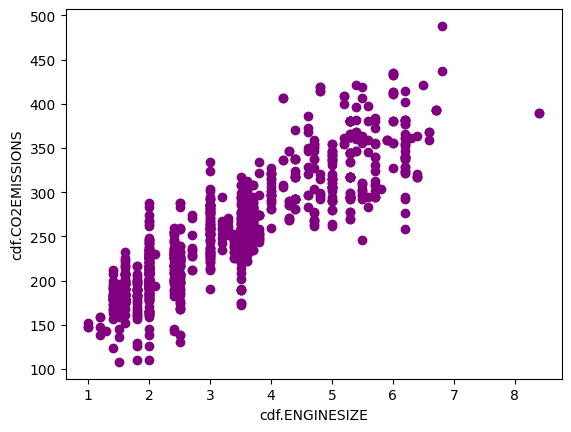

In [14]:
plt. scatter (cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'purple')
plt.xlabel ('cdf.ENGINESIZE')
plt.ylabel ('cdf.CO2EMISSIONS')
plt.show

In [15]:
msk = np.random.rand (len (df)) < 0.8
train = cdf[msk]
test = cdf [~msk]
print (msk)
print (~msk)
print (cdf)
print (train)
print (test)

[ True  True  True ...  True  True  True]
[False False False ... False False False]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
0            2.0          4                  6.7                   8.5   
1            2.4          4                  7.7                   9.6   
2            1.5          4                  5.8                   5.9   
3            3.5          6                  9.1                  11.1   
4            3.5          6                  8.7                  10.6   
...          ...        ...                  ...                   ...   
1062         3.0          6                  9.8                  11.8   
1063         3.2          6                  9.5                  11.5   
1064         3.0          6                  9.8                  11.8   
1065         3.2          6                  9.3                  11.3   
1066         3.2          6                 10.2                  12.8   

      CO2EMISSIONS  
0     

#### Modeling

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])  
test_y = np.asanyarray(test[['CO2EMISSIONS']]) 
                               
poly = PolynomialFeatures (degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

#### Linear Regression Function 

In [19]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit  (train_x_poly, train_y)

print ('coefficiants: ', clf.coef_)
print ('intercept: ', clf.intercept_)

coefficiants:  [[ 0.         50.48928551 -1.56297857]]
intercept:  [107.03149384]


Text(0, 0.5, 'CO2EMISSIONS')

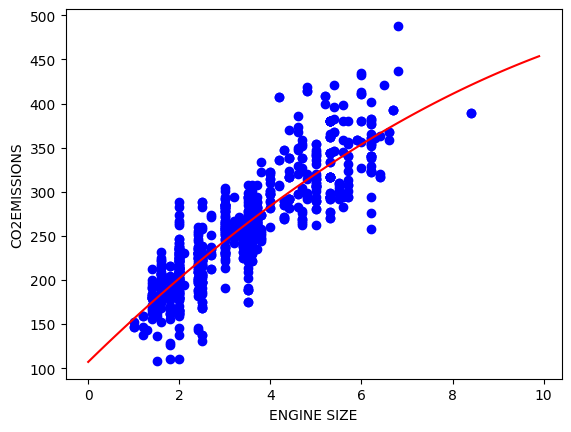

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*xx + clf.coef_[0][2]* np.power(xx, 2)
plt.plot(xx, yy, '-r')


plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2EMISSIONS')




In [24]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)


print ("Mean Squared Error:%.2f " % np.mean((test_y_ - test_y)** 2))
print ("Mean Absolute Error:%.2f " % np.mean (np.absolute(test_y_ -test_y)))
print ( "R2-Score : %.2f " % r2_score(test_y, test_y_))

Mean Squared Error:1072.88 
Mean Absolute Error:25.39 
R2-Score : 0.76 
